In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score
%matplotlib inline 

In [4]:
df = pd.read_csv('imdbmoviesindia.csv',encoding='ISO-8859-1')

In [5]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [6]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [8]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [9]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [10]:
df.dropna(inplace=True)
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [11]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [12]:
def split_genre_column(MovieData):
   
    MovieData['Genre1'] = MovieData['Genre'].str.split(',', expand=True)[0]
    MovieData['Genre2'] = MovieData['Genre'].str.split(',', expand=True)[1]
    MovieData['Genre3'] = MovieData['Genre'].str.split(',', expand=True)[2]
    return MovieData
dfn=split_genre_column(df)

In [13]:
dfn.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre1,Genre2,Genre3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama,None,None
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy,Romance,None
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,Comedy,Drama,Musical
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,Drama,Romance,War
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,Horror,Mystery,Thriller


In [14]:
df=dfn

In [15]:
df['Votes'] = df['Votes'].str.replace(',','').astype('int')
df['Year'] = df['Year'].str.strip('()').astype(int)

In [16]:
df['Duration'] = df['Duration'].str.strip('min')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int64  
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int64  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
 10  Genre1    5659 non-null   object 
 11  Genre2    4001 non-null   object 
 12  Genre3    2319 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 619.0+ KB


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre1,Genre2,Genre3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama,None,None
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy,Romance,None
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,Comedy,Drama,Musical
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,Drama,Romance,War
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,Horror,Mystery,Thriller


In [17]:
DirectorCounts =df['Director'].value_counts()
df['DirectorPopularity']= df['Director'].map(DirectorCounts)     #shows how many movies director has made

ActorCounts= df['Actor 1'].value_counts() 
df['ActorPopularity']=df['Actor 1'].map(ActorCounts)

In [18]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre1,Genre2,Genre3,DirectorPopularity,ActorPopularity
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama,None,None,1,2
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy,Romance,None,1,5
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,Comedy,Drama,Musical,15,18
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,Drama,Romance,War,6,20
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,Horror,Mystery,Thriller,1,1


In [19]:
df.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre1,Genre2,Genre3,DirectorPopularity,ActorPopularity
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama,None,None,1,2
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy,Romance,None,1,5
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,Comedy,Drama,Musical,15,18
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,Drama,Romance,War,6,20
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,Horror,Mystery,Thriller,1,1


<Axes: xlabel='Votes', ylabel='Count'>

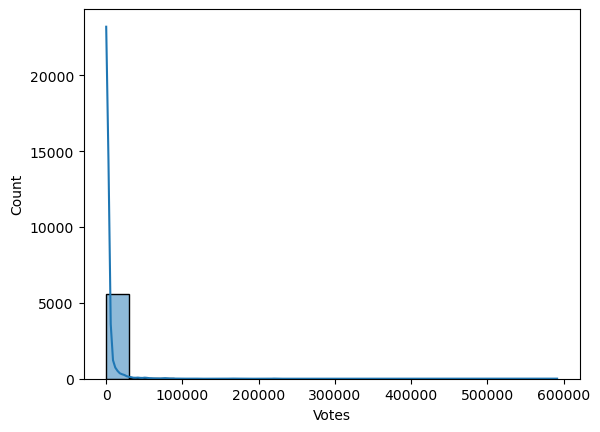

In [20]:
sns.histplot(df['Votes'],bins=20,kde=True)

In [21]:
df['LogVotes']=np.log1p(df['Votes'])
df['LogVotes']

1        2.197225
3        3.583519
5        6.719013
6        6.991177
8        5.789960
           ...   
15493    6.013715
15494    7.311218
15503    3.806662
15505    6.486161
15508    3.044522
Name: LogVotes, Length: 5659, dtype: float64

<Axes: xlabel='LogVotes', ylabel='Count'>

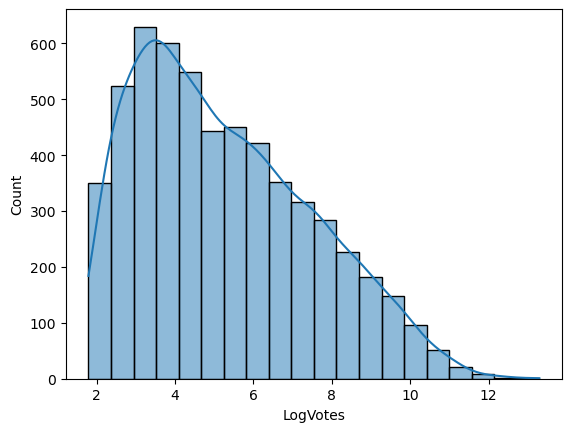

In [22]:
sns.histplot(df['LogVotes'],bins=20,kde=True)

In [23]:
DirectorAvgRating = df.groupby('Director')['Rating'].mean()
df['DirectorAvgRating'] = df['Director'].map(DirectorAvgRating)

ActorAvgRating = df[['Actor 1']].stack().reset_index(name='Actor')
ActorAvgRating = ActorAvgRating.merge(df[['Rating']], left_on='level_0', right_index=True)
ActorAvgRating = ActorAvgRating.groupby('Actor')['Rating'].mean()
df['ActorAvgRating'] = df['Actor 1'].map(ActorAvgRating) 

In [24]:
df.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre1,Genre2,Genre3,DirectorPopularity,ActorPopularity,LogVotes,DirectorAvgRating,ActorAvgRating
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama,None,None,1,2,2.197225,7.000000,6.850000
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy,Romance,None,1,5,3.583519,4.400000,5.420000
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,Comedy,Drama,Musical,15,18,6.719013,5.313333,4.788889
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,Drama,Romance,War,6,20,6.991177,7.383333,5.435000
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,Horror,Mystery,Thriller,1,1,5.789960,5.600000,5.600000


In [25]:
df['MovieAge'] = 2024 - df['Year']
df['MovieAge'] 

1         5
3         5
5        27
6        19
8        12
         ..
15493     9
15494    23
15503    35
15505    25
15508    26
Name: MovieAge, Length: 5659, dtype: int64

In [26]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre1,Genre2,Genre3,DirectorPopularity,ActorPopularity,LogVotes,DirectorAvgRating,ActorAvgRating,MovieAge
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama,None,None,1,2,2.197225,7.000000,6.850000,5
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy,Romance,None,1,5,3.583519,4.400000,5.420000,5
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,Comedy,Drama,Musical,15,18,6.719013,5.313333,4.788889,27
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,Drama,Romance,War,6,20,6.991177,7.383333,5.435000,19
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,Horror,Mystery,Thriller,1,1,5.789960,5.600000,5.600000,12


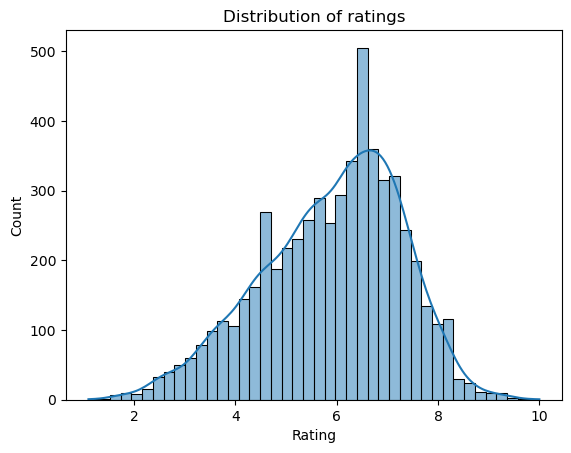

In [27]:
sns.histplot(data=df,x='Rating',kde=True)
plt.title('Distribution of ratings')
plt.show()


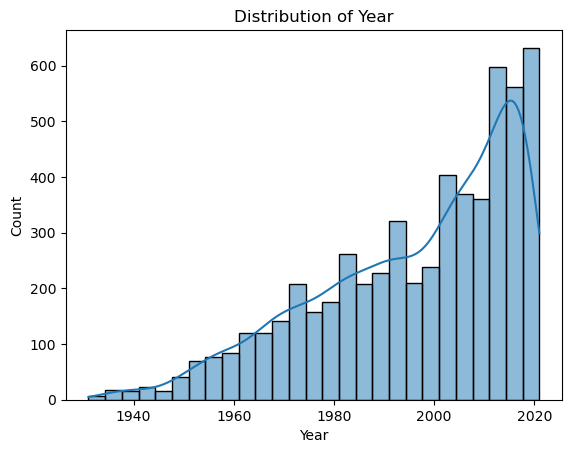

In [28]:
sns.histplot(data=df,x='Year',kde=True)
plt.title('Distribution of Year')
plt.show()

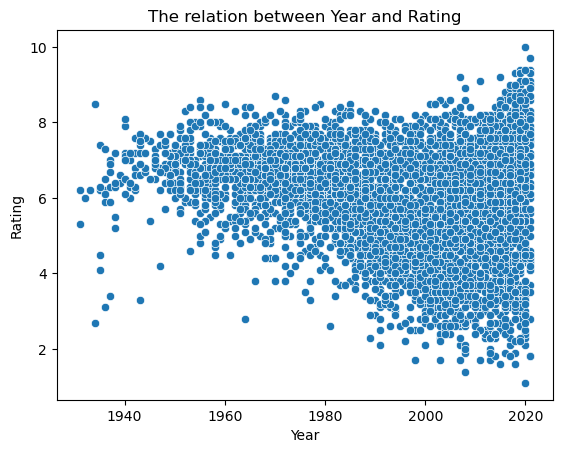

In [29]:
sns.scatterplot(data=df,x='Year',y='Rating')
plt.title("The relation between Year and Rating")
plt.show()


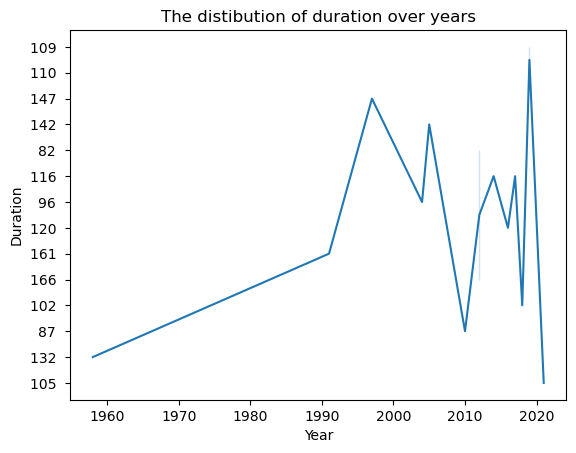

In [30]:
sns.lineplot(data=df.head(15),x='Year',y='Duration')
plt.title('The distibution of duration over years')
plt.show()


Drama          3796
Action         1686
Romance        1380
Comedy         1344
Crime           875
Thriller        679
Family          416
Musical         412
Mystery         304
Adventure       277
Horror          202
Fantasy         146
Biography       115
History          99
Music            53
Documentary      48
Sport            40
Animation        40
War              33
Sci-Fi           32
News              1
Western           1
Name: count, dtype: int64
Index(['Drama', 'Action', 'Romance', 'Comedy', 'Crime', 'Thriller', 'Family',
       'Musical', 'Mystery', 'Adventure', 'Horror', 'Fantasy', 'Biography',
       'History', 'Music', 'Documentary', 'Sport', 'Animation', 'War',
       'Sci-Fi', 'News', 'Western'],
      dtype='object')
[3796 1686 1380 1344  875  679  416  412  304  277  202  146  115   99
   53   48   40   40   33   32    1    1]


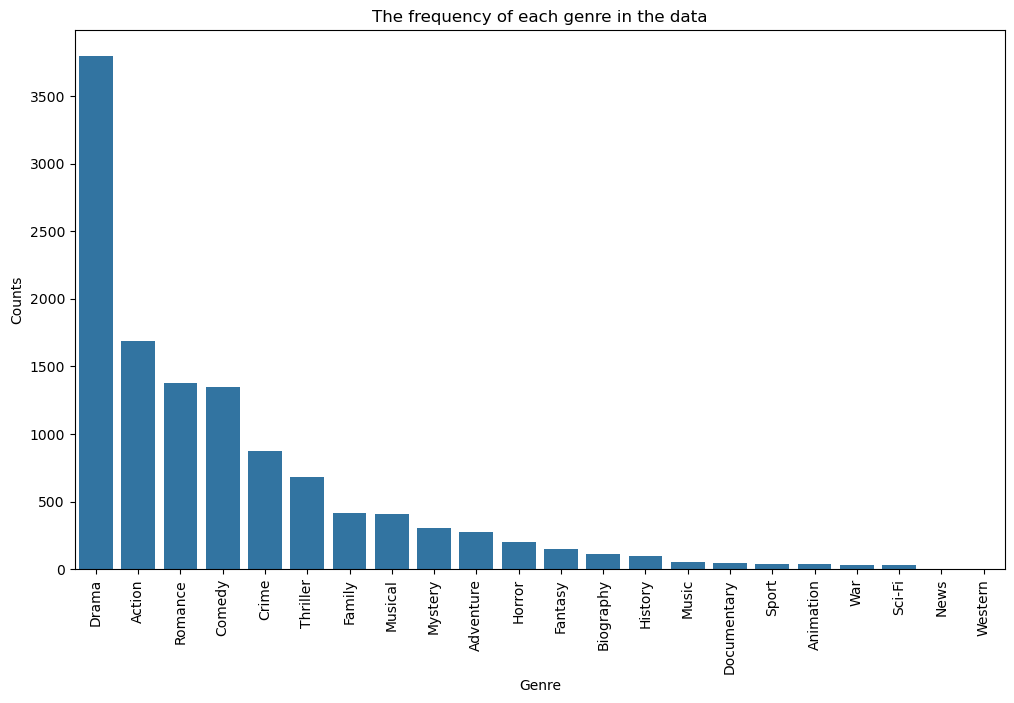

In [31]:
movies_genre = df['Genre'].str.split(', ',expand=True).stack().value_counts()
labels = movies_genre.keys()
count = movies_genre.values
print(movies_genre)
print(labels)
print(count)
plt.figure(figsize=(12,7))
sns.barplot(x=labels,y=count)
plt.xticks(rotation=90)
plt.title('The frequency of each genre in the data')
plt.xlabel('Genre')
plt.ylabel('Counts')
plt.show()

In [32]:
encoder = LabelEncoder()
df['Actor 1'] = encoder.fit_transform(dfn['Actor 1'])
df['Actor 2'] = encoder.fit_transform(dfn['Actor 2'])
df['Actor 3'] = encoder.fit_transform(dfn['Actor 3'])
df['Genre1'] = encoder.fit_transform(dfn['Genre1'])
df['Genre2'] = encoder.fit_transform(dfn['Genre2'])
df['Genre3'] = encoder.fit_transform(dfn['Genre3'])
df['Director'] = encoder.fit_transform(dfn['Director'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                5659 non-null   object 
 1   Year                5659 non-null   int64  
 2   Duration            5659 non-null   object 
 3   Genre               5659 non-null   object 
 4   Rating              5659 non-null   float64
 5   Votes               5659 non-null   int64  
 6   Director            5659 non-null   int64  
 7   Actor 1             5659 non-null   int64  
 8   Actor 2             5659 non-null   int64  
 9   Actor 3             5659 non-null   int64  
 10  Genre1              5659 non-null   int64  
 11  Genre2              5659 non-null   int64  
 12  Genre3              5659 non-null   int64  
 13  DirectorPopularity  5659 non-null   int64  
 14  ActorPopularity     5659 non-null   int64  
 15  LogVotes            5659 non-null   float64
 16  DirectorAv

In [33]:
df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre1,Genre2,Genre3,DirectorPopularity,ActorPopularity,LogVotes,DirectorAvgRating,ActorAvgRating,MovieAge
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,629,1352,2272,319,7,18,20,1,2,2.197225,7.000000,6.850000,5
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,1335,1198,719,2148,4,13,20,1,5,3.583519,4.400000,5.420000,5
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,1530,378,75,2045,4,5,11,15,18,6.719013,5.313333,4.788889,27
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,2044,692,1112,2524,7,13,18,6,20,6.991177,7.383333,5.435000,19
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,135,1934,1175,1013,11,12,17,1,1,5.789960,5.600000,5.600000,12


In [34]:
df2 = df.drop('Name',axis=1)
df2.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre1,Genre2,Genre3,DirectorPopularity,ActorPopularity,LogVotes,DirectorAvgRating,ActorAvgRating,MovieAge
1,2019,109,Drama,7.0,8,629,1352,2272,319,7,18,20,1,2,2.197225,7.000000,6.850000,5
3,2019,110,"Comedy, Romance",4.4,35,1335,1198,719,2148,4,13,20,1,5,3.583519,4.400000,5.420000,5
5,1997,147,"Comedy, Drama, Musical",4.7,827,1530,378,75,2045,4,5,11,15,18,6.719013,5.313333,4.788889,27
6,2005,142,"Drama, Romance, War",7.4,1086,2044,692,1112,2524,7,13,18,6,20,6.991177,7.383333,5.435000,19
8,2012,82,"Horror, Mystery, Thriller",5.6,326,135,1934,1175,1013,11,12,17,1,1,5.789960,5.600000,5.600000,12


In [35]:
X = df2.drop(['Rating','Genre'],axis=1)
y= df2['Rating']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [36]:
model = LinearRegression()

model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(y_pred)

[5.87361681 1.81949844 4.75942384 ... 5.40708475 5.44558397 5.59751033]


Text(0.5, 1.0, 'Movie Rating prediction Using Regression')

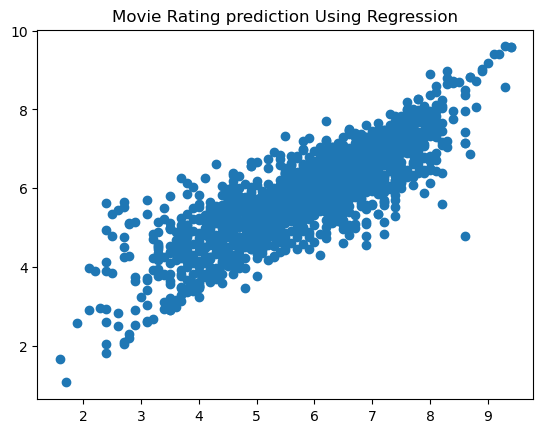

In [37]:
plt.scatter(y_test,y_pred)
plt.title('Movie Rating prediction Using Regression')

In [38]:
rs = r2_score(y_pred,y_test)
rs

0.6218970182857597

In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [40]:
model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(y_pred)

[5.59475215 1.82675839 3.51582827 ... 5.68726034 5.90976587 3.74706467]


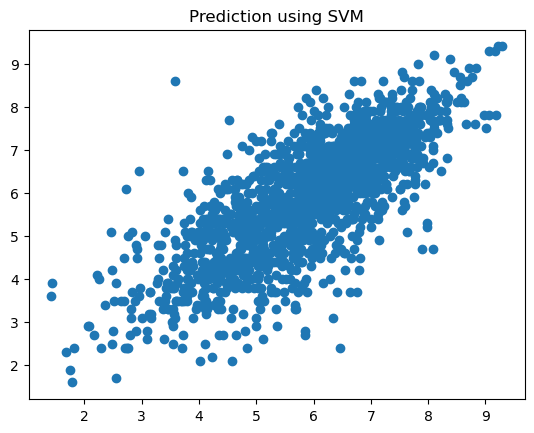

In [41]:
# sns.scatterplot(x='y_pred',y='y_test')
plt.scatter(y_pred,y_test)
plt.title("Prediction using SVM")
plt.show()

In [42]:
print(f"Mean Absolute Error : {mean_absolute_error(y_test,y_pred)}")
print(f"Mean Squared Error : {mean_squared_error(y_test,y_pred)}")

Mean Absolute Error : 0.6677994873417121
Mean Squared Error : 0.7986517965802737


In [43]:
rsq = r2_score(y_test,y_pred)
rsq

0.5640387032187513

In [44]:
print(y_test[:10])  
print(y_pred[:10])

10971    6.0
14052    2.4
10002    3.8
3970     3.8
8840     7.2
5071     6.3
2709     8.6
11842    3.9
10910    6.6
4485     6.6
Name: Rating, dtype: float64
[5.59475215 1.82675839 3.51582827 4.96907697 7.19410697 4.19127547
 3.58359288 4.46557948 7.4632063  6.76968827]


In [45]:
y_pred = np.round(y_pred, 1)

print(y_pred[:10])

[5.6 1.8 3.5 5.  7.2 4.2 3.6 4.5 7.5 6.8]


In [46]:
print(y_test.shape)
print(y_pred.shape)

(1698,)
(1698,)


In [47]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 0.894351467000152
